### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)       
pd.set_option('display.max_colwidth', None)   


## Criação do DataFrame

In [ ]:
load_dotenv() 
database_url = os.getenv("NEON_DATABASE_URL")

engine = create_engine(database_url)
query = "SELECT * FROM hotel_bookings"

df = pd.read_sql(query, engine)
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### EDA

In [9]:
df.shape

(119390, 32)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.dropna(subset=['country'], inplace=True)

In [9]:
df['hotel'].value_counts()

hotel
City Hotel      79306
Resort Hotel    39596
Name: count, dtype: int64

In [28]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [29]:
for c in df.dtypes[df.dtypes == 'object'].index:
    print(c)

arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type
reservation_status
reservation_status_date


In [ ]:
df['hotel'] = df['hotel'].apply(lambda x: 1 if x == 'Resort Hotel' else 0)

In [34]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 
                                                         'April':4, 'May':5, 'June':6,
                                                         'July':7, 'August':8, 'September':9, 
                                                         'October':10, 'November':11, 'December':12})

In [45]:
df['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

C:\Users\marce\AppData\Local\Temp\ipykernel_25996\3769559809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts.head(15), x='country', y='visitors', palette='viridis')


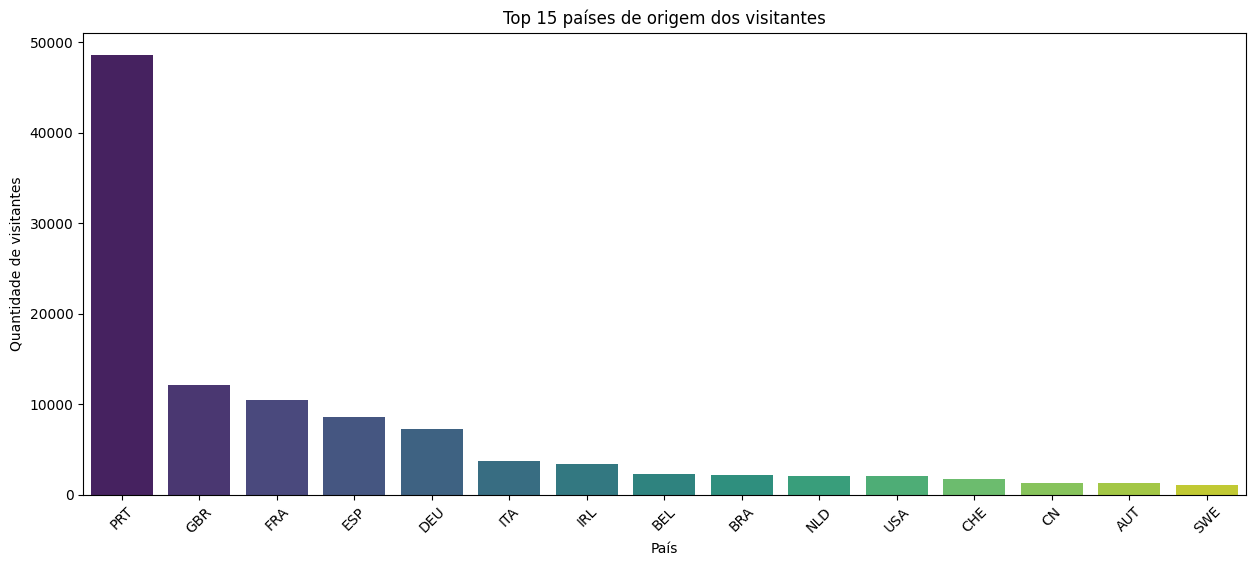

In [50]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'visitors']

plt.figure(figsize=(15, 6))
sns.barplot(data=country_counts.head(15), x='country', y='visitors', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 15 países de origem dos visitantes')
plt.xlabel('País')
plt.ylabel('Quantidade de visitantes')
plt.show()



### V1. Primeiro Ciclo

#### RF

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

x = df[['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults']]
y = df['is_canceled']


##### Divisão e Pre-Processamento

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Random Forest

In [65]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_param_grid,
    cv=5,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
print(f"Melhores parâmetros RandomForest: {rf_grid.best_params_}")

Melhores parâmetros RandomForest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [66]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2)
rf.fit(X_train_scaled, y_train)

rf.score(X_test_scaled, y_test)

0.7917665363105

##### XGBoost

In [62]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss'), 
    param_grid=xgb_param_grid,
    cv=5,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)
print(f"Melhores parâmetros XGBoost: {xgb_grid.best_params_}")

Melhores parâmetros XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}


In [64]:
xgb = XGBClassifier(n_estimators=200, random_state=42, max_depth=10, learning_rate=0.2, subsample=1)
xgb.fit(X_train_scaled, y_train)

xgb.score(X_test_scaled, y_test)

0.7818846978680459

##### SVM

In [60]:
svm = svm.SVC()
svm.fit(X_train_scaled, y_train)

svm.score(X_test_scaled, y_test)

0.6955973255960641